<a href="https://colab.research.google.com/github/SinHarsh24/Dynamic-Pricing-Strategy/blob/main/Dynamic_Pricing_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To implement a data-driven dynamic pricing strategy, businesses typically require data that can provide insights into customer behaviour, market trends, and other influencing factors. So to create a dynamic pricing strategy, we need to have a dataset based on:**


1.   Historical Sales Data
2.   Customer Purchase Pattern
3.   Marker Demand forecasts
4.   Cost Data
5.   Customer Segementation Data
6.   Real Time Market Data



# Importing Libraries and Analysing Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("dynamic_pricing.csv")
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [6]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


 Relationship between expected ride duration and the historical cost of the ride:

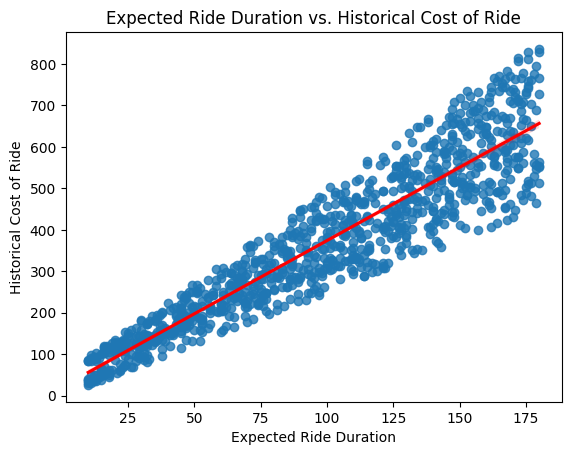

In [7]:
# Replace 'Expected_Ride_Duration' and 'Historical_Cost_of_Ride' with your actual column names
x = data['Expected_Ride_Duration']
y = data['Historical_Cost_of_Ride']

sns.regplot(x=x, y=y, line_kws={"color": "red"})

# Set plot labels and title
plt.xlabel('Expected Ride Duration')
plt.ylabel('Historical Cost of Ride')
plt.title('Expected Ride Duration vs. Historical Cost of Ride')

# Show the plot
plt.show()

 Distribution of the historical cost of rides based on the vehicle type:



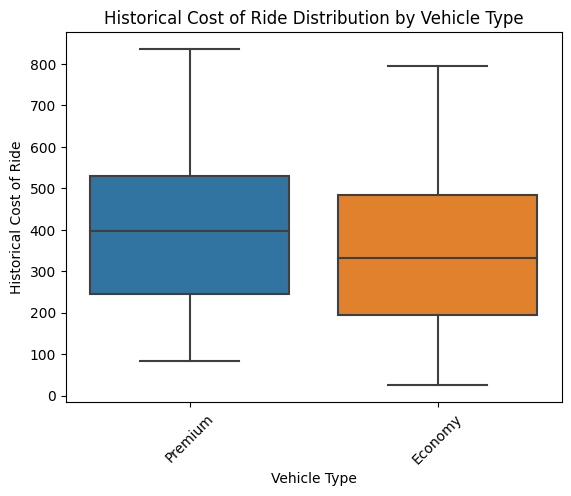

In [8]:
# Replace 'Vehicle_Type' and 'Historical_Cost_of_Ride' with your actual column names
x = 'Vehicle_Type'  # Categorical variable for the x-axis
y = 'Historical_Cost_of_Ride'  # Numeric variable for the y-axis

# Create a box plot using Seaborn
sns.boxplot(x=x, y=y, data=data)

# Set plot labels and title
plt.xlabel('Vehicle Type')
plt.ylabel('Historical Cost of Ride')
plt.title('Historical Cost of Ride Distribution by Vehicle Type')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

Correlation Matrix:

<ipython-input-9-9164360c7d09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


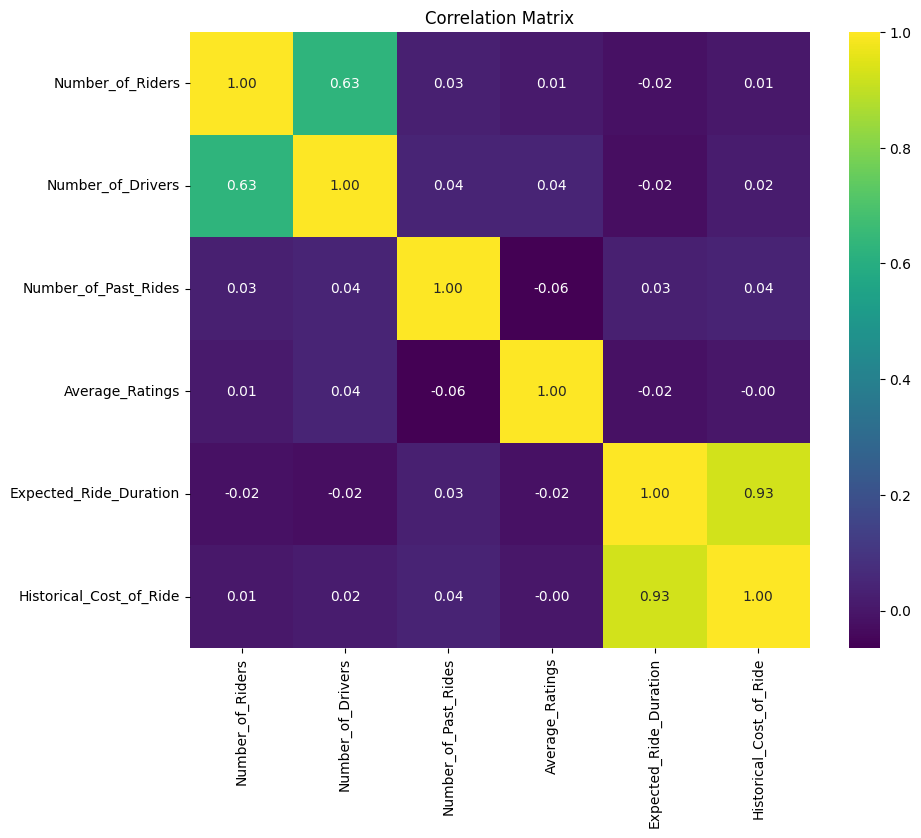

In [9]:
corr_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(data=corr_matrix, annot=True, cmap='viridis', fmt=".2f")

# Set plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

# Implementing a Dynamic Pricing Strategy

The company is transitioning from a static pricing model based solely on expected ride duration to a dynamic pricing strategy. This new approach will adapt ride costs in real-time based on demand and supply conditions. Prices will increase during high-demand and low-supply times, and decrease during low-demand and high-supply periods.






In [11]:
import numpy as np

# Calculate demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25

data['demand_multiplier'] = np.where(data['Number_of_Riders'] > np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                     data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                     data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], low_demand_percentile))

# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

data['supply_multiplier'] = np.where(data['Number_of_Drivers'] > np.percentile(data['Number_of_Drivers'], low_supply_percentile),
                                     np.percentile(data['Number_of_Drivers'], high_supply_percentile) / data['Number_of_Drivers'],
                                     np.percentile(data['Number_of_Drivers'], low_supply_percentile) / data['Number_of_Drivers'])

# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

# Calculate adjusted_ride_cost for dynamic pricing
data['adjusted_ride_cost'] = data['Historical_Cost_of_Ride'] * (
    np.maximum(data['demand_multiplier'], demand_threshold_low) *
    np.maximum(data['supply_multiplier'], supply_threshold_high)
)

In the code, we determine the demand multiplier by comparing the number of riders to high and low demand percentiles. If riders exceed the high-demand percentile, the multiplier is the number of riders divided by the high-demand percentile. Conversely, if riders are below the low-demand percentile, the multiplier is the number of riders divided by the low-demand percentile.






#  Profit percentage we got after implementing this dynamic pricing strategy:

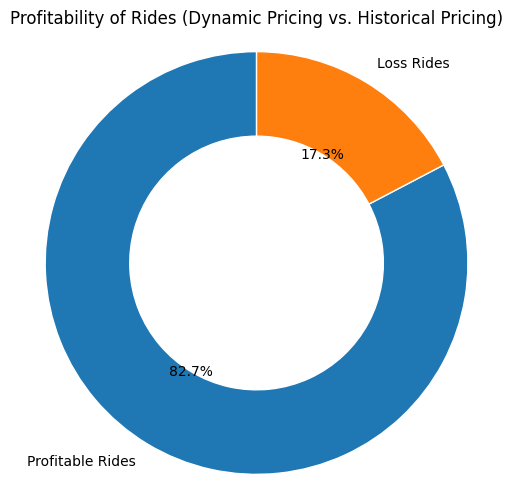

In [14]:
# Calculate the profit percentage for each ride
data['profit_percentage'] = ((data['adjusted_ride_cost'] - data['Historical_Cost_of_Ride']) / data['Historical_Cost_of_Ride']) * 100
# Identify profitable rides where profit percentage is positive
profitable_rides = data[data['profit_percentage'] > 0]

# Identify loss rides where profit percentage is negative
loss_rides = data[data['profit_percentage'] < 0]

# Calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

# Data for the pie chart
labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a white circle in the center to create the appearance of a donut chart
circle = plt.Circle((0, 0), 0.3, color='white')
plt.gca().add_artist(circle)

# Set plot title
plt.title('Profitability of Rides (Dynamic Pricing vs. Historical Pricing)')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


Relationship between the expected ride duration and the cost of the ride based on the dynamic pricing strategy:

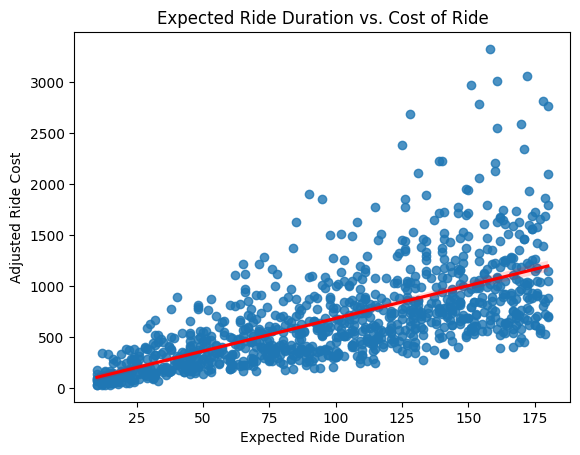

In [15]:
# Replace 'Expected_Ride_Duration' and 'adjusted_ride_cost' with your actual column names
x = data['Expected_Ride_Duration']
y = data['adjusted_ride_cost']

# Create a scatter plot with a regression line using Seaborn
sns.regplot(x=x, y=y, line_kws={"color": "red"})

# Set plot labels and title
plt.xlabel('Expected Ride Duration')
plt.ylabel('Adjusted Ride Cost')
plt.title('Expected Ride Duration vs. Cost of Ride')

# Show the plot
plt.show()

# Training the Predictive Model

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def data_preprocessing_pipeline(data):
    #Identify numeric and categorical features
    numeric_features = data.select_dtypes(include=['float', 'int']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    #Handle missing values in numeric features
    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

    #Detect and handle outliers in numeric features using IQR
    for feature in numeric_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                                 data[feature].mean(), data[feature])

    #Handle missing values in categorical features
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

    return data


To incorporate vehicle type as a numerical feature, we need to perform encoding.

In [18]:
data["Vehicle_Type"] = data["Vehicle_Type"].map({"Premium": 1,
                                           "Economy": 0})

Now let’s split the data and train a Machine Learning model to predict the cost of a ride:

In [19]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]])
y = np.array(data[["adjusted_ride_cost"]])

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Reshape y to 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()

# Training a random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

Testing this Machine Learning model using some input values:

In [20]:
def get_vehicle_type_numeric(vehicle_type):
    vehicle_type_mapping = {
        "Premium": 1,
        "Economy": 0
    }
    vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
    return vehicle_type_numeric

# Predicting using user input values
def predict_price(number_of_riders, number_of_drivers, vehicle_type, Expected_Ride_Duration):
    vehicle_type_numeric = get_vehicle_type_numeric(vehicle_type)
    if vehicle_type_numeric is None:
        raise ValueError("Invalid vehicle type")

    input_data = np.array([[number_of_riders, number_of_drivers, vehicle_type_numeric, Expected_Ride_Duration]])
    predicted_price = model.predict(input_data)
    return predicted_price

# Example prediction using user input values
user_number_of_riders = 50
user_number_of_drivers = 25
user_vehicle_type = "Economy"
Expected_Ride_Duration = 30
predicted_price = predict_price(user_number_of_riders, user_number_of_drivers, user_vehicle_type, Expected_Ride_Duration)
print("Predicted price:", predicted_price)

Predicted price: [248.18029572]


# Comparison of the actual and predicted results:

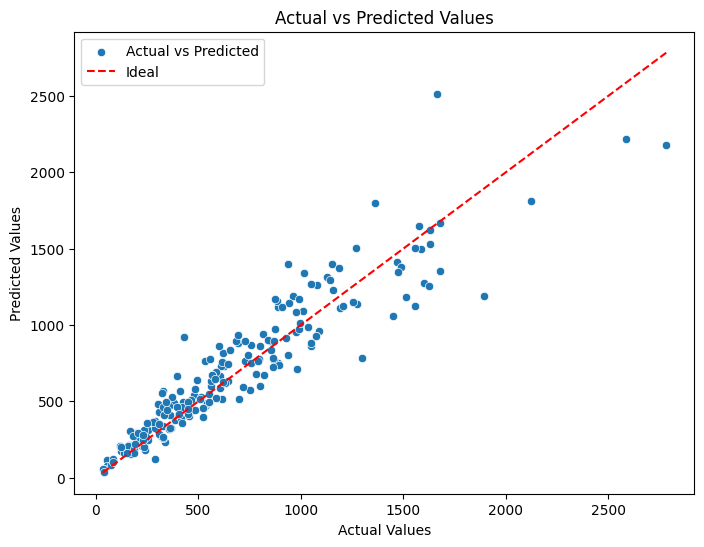

In [21]:
import plotly.graph_objects as go

# Predict on the test set
y_pred = model.predict(x_test)

# Create a scatter plot with actual vs predicted values using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred, label='Actual vs Predicted')

# Add a line representing the ideal case
plt.plot([min(y_test.flatten()), max(y_test.flatten())], [min(y_test.flatten()), max(y_test.flatten())], color='red', linestyle='--', label='Ideal')

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Show the legend
plt.legend()

# Show the plot
plt.show()


# Summary


A dynamic pricing strategy seeks to optimize revenue and profitability by setting prices that align with the interplay between supply and demand. This approach enables businesses to flexibly adjust prices in response to various factors such as time of day, day of the week, customer segments, inventory levels, seasonal variations, competitive pricing, and prevailing market conditions.